In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.parser import parse
import missingno as msno
import seaborn as sns

In [3]:
# Datos de mediciones de fin de semana
weekend_data = pd.read_csv('../data/weekends.csv',index_col=0,parse_dates=True)
weekend_data = weekend_data.resample("600S").interpolate(method='time')
#weekend_data

In [4]:
# Nombres de e+ siempre los mismos
nombres = np.genfromtxt('../idf/cubiculo_original/c003/c003.csv',
                        dtype='U',delimiter=',',max_rows=1,)
nombres

for i,nombre in enumerate(nombres):
    print(i,nombre)

0 Date/Time
1 THERMAL ZONE: JORGE:Zone Mean Air Temperature [C](TimeStep)


In [5]:
# funcion para importar datos de e+
def importa(file,caso):
    nombres = ['tiempo',f'Ti_{caso}']
    simulate = pd.read_csv(file,names=nombres,skiprows=1)
    simulate.tiempo = simulate.tiempo.str.replace('24:00:00','23:59:59')
    simulate.tiempo = '2019-'+simulate.tiempo
    simulate.tiempo = pd.to_datetime(simulate.tiempo,format='%Y- %m/%d %H:%M:%S')
    simulate.tiempo = simulate.tiempo-pd.Timedelta('10minute')
    simulate.set_index('tiempo',inplace=True)
    # Hago columna de dias para hacer mascara (opcional)
    #simulate['dia'] = simulate.index.day_of_week
    # solo dines de semana de simulaciones
    weekend_simu = simulate[simulate.index.day_of_week>=5]
    return weekend_simu

In [19]:
c003 = importa('../idf/cubiculo_original/c003/c003.csv','003')
c01  = importa('../idf/cubiculo_original/c01/c01.csv','01')
c001 = importa('../idf/cubiculo_original/c001/c001.csv','001')
c0001 = importa('../idf/cubiculo_original/c0001/c0001.csv','0001')

In [20]:
data = pd.concat([weekend_data,c003,c01,c001,c0001],axis=1)
data

,TCAire,Ti_003,Ti_01,Ti_001,Ti_0001
tiempo,,,,,
2019-05-04 00:00:00,NaN,26.818103,26.390593,27.115184,27.339205
2019-05-04 00:10:00,NaN,26.908547,26.508675,27.120130,27.265845
2019-05-04 00:20:00,NaN,26.786146,26.256717,27.035762,27.186725
2019-05-04 00:30:00,NaN,26.551434,25.953926,26.897846,27.107640
2019-05-04 00:40:00,NaN,26.495355,25.950801,26.837459,27.055312
...,...,...,...,...,...
2019-07-28 23:10:00,25.432277,NaN,NaN,NaN,NaN
2019-07-28 23:20:00,24.818508,NaN,NaN,NaN,NaN
2019-07-28 23:30:00,24.905036,NaN,NaN,NaN,NaN


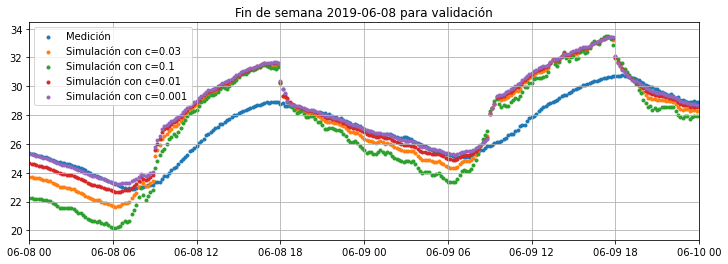

In [26]:
fig, ax = plt.subplots(figsize=(12,4))

fecha1 = parse('2019-06-08')
fecha2 = fecha1 + pd.Timedelta('2D')

ax.set_xlim(fecha1,fecha2)
ax.scatter(data.index,data.TCAire,marker='.',label='Medición')
ax.scatter(data.index,data.Ti_003,marker='.',label='Simulación con c=0.03')
ax.scatter(data.index,data.Ti_01,marker='.',label='Simulación con c=0.1')
ax.scatter(data.index,data.Ti_001,marker='.',label='Simulación con c=0.01')
ax.scatter(data.index,data.Ti_0001,marker='.',label='Simulación con c=0.001')
ax.set_title('Fin de semana 2019-06-08 para validación')
ax.legend()
ax.grid()

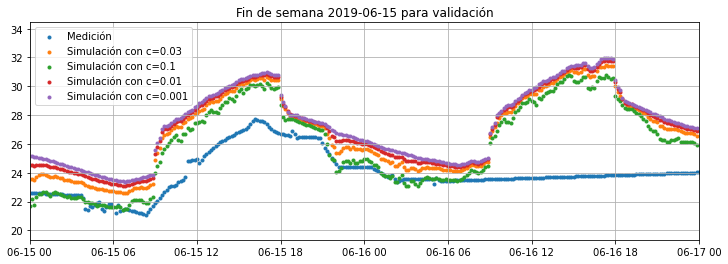

In [30]:
fig, ax = plt.subplots(figsize=(12,4))

fecha1 = parse('2019-06-15')
fecha2 = fecha1 + pd.Timedelta('2D')

ax.set_xlim(fecha1,fecha2)
ax.scatter(data.index,data.TCAire,marker='.',label='Medición')
ax.scatter(data.index,data.Ti_003,marker='.',label='Simulación con c=0.03')
ax.scatter(data.index,data.Ti_01,marker='.',label='Simulación con c=0.1')
ax.scatter(data.index,data.Ti_001,marker='.',label='Simulación con c=0.01')
ax.scatter(data.index,data.Ti_0001,marker='.',label='Simulación con c=0.001')
ax.set_title('Fin de semana 2019-06-15 para validación')
ax.legend()
ax.grid()

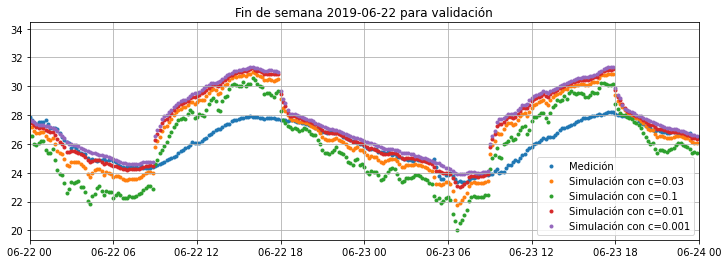

In [31]:
fig, ax = plt.subplots(figsize=(12,4))

fecha1 = parse('2019-06-22')
fecha2 = fecha1 + pd.Timedelta('2D')

ax.set_xlim(fecha1,fecha2)
ax.scatter(data.index,data.TCAire,marker='.',label='Medición')
ax.scatter(data.index,data.Ti_003,marker='.',label='Simulación con c=0.03')
ax.scatter(data.index,data.Ti_01,marker='.',label='Simulación con c=0.1')
ax.scatter(data.index,data.Ti_001,marker='.',label='Simulación con c=0.01')
ax.scatter(data.index,data.Ti_0001,marker='.',label='Simulación con c=0.001')
ax.set_title('Fin de semana 2019-06-22 para validación')
ax.legend()
ax.grid()